# 环形链表II

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/linked-list-cycle/**

## 一、题目

给定一个链表的头节点  head ，返回链表开始入环的第一个节点。 如果链表无环，则返回 null。

如果链表中有某个节点，可以通过连续跟踪 next 指针再次到达，则链表中存在环。 为了表示给定链表中的环，评测系统内部使用整数 pos 来表示链表尾连接到链表中的位置（索引从 0 开始）。如果 pos 是 -1，则在该链表中没有环。注意：pos 不作为参数进行传递，仅仅是为了标识链表的实际情况。

不允许修改 链表。

### 提示：

- 链表中节点的数目范围在范围 [0, 10^4] 内
- -10^5 <= Node.val <= 10^5
- pos 的值为 -1 或者链表中的一个有效索引

## 二、示例

### 示例 1:

3 → 2 → 0 → -4

&emsp;&emsp;↑&emsp;&emsp;&emsp;&emsp;↓

&emsp;&emsp;↑&emsp;←&emsp;←

输入：head = [3,2,0,-4], pos = 1

输出：返回索引为 1 的链表节点

解释：链表中有一个环，其尾部连接到第二个节点。

### 示例 2:

1 → 2 

↑&emsp;&emsp;↓

&emsp;←

输入：head = [1,2], pos = 0

输出：返回索引为 0 的链表节点

解释：链表中有一个环，其尾部连接到第一个节点。

### 示例 3：

输入：head = [1], pos = -1

输出：返回 null

解释：链表中没有环。

## 三、解题思路

In [1]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

In [2]:
head = ListNode(3)
head.next = ListNode(2)
head.next.next = ListNode(0)
head.next.next.next = ListNode(-4)
head.next.next.next.next = head.next

head2 = ListNode(1)
head2.next = ListNode(2)
head2.next.next = head2

head3 = ListNode(1)

### 一、利用set

In [3]:
class Solution:
    def detectCycle(self, head: ListNode) -> ListNode:
        tmp = set()
        while head:
            if head in tmp:
                return head
            tmp.add(head)
            head = head.next
        return None

In [4]:
s = Solution()
s.detectCycle(head).val

2

In [5]:
s.detectCycle(head2).val

1

In [6]:
s.detectCycle(head3)

### 二、快慢指针

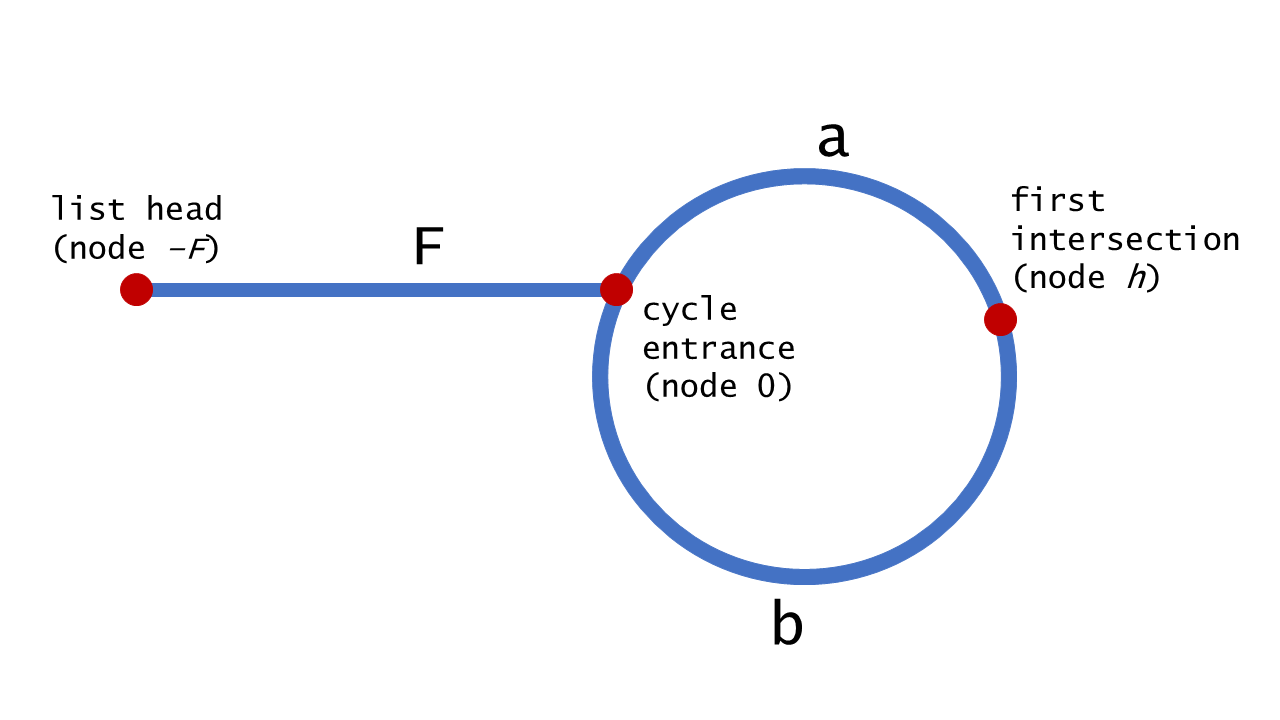

我们利用已知的条件：慢指针移动 1 步，快指针移动 2 步，来说明它们相遇在环的入口处。（下面证明中的 tortoise 表示慢指针，hare 表示快指针）

\begin{aligned} 2 \cdot distance(tortoise) &= distance(hare) \\ 2(F+a) &= F+a+b+a \\ 2F+2a &= F+2a+b \\ F &= b \\ \end{aligned}

In [7]:
class Solution2:
    def detectCycle(self, head: ListNode) -> ListNode:
        p1, p2 = head, head
        while p2:
            if not p2.next:
                return None
            p1 = p1.next
            p2 = p2.next.next
            if p1 == p2:
                break
        # 注意此处要用p2来判断，否则偶数不成环无法判断，因为p2走的快为None时跳出上述循环了，而不会return None，仅用p1无法判断所有的不成环条件
        if not p2:
            return None
        # 走到这里则 p1 = p2 = meet
        p1 = head
        while p1 != p2:
            p1 = p1.next
            p2 = p2.next
        return p1

In [8]:
s2 = Solution2()
s2.detectCycle(head).val

2

In [9]:
s2.detectCycle(head2).val

1

In [10]:
s2.detectCycle(head3)